<a href="https://colab.research.google.com/github/invegat/DS-Sprint-01-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [8]:
import pandas as pd
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"
df = pd.read_csv(url, header=None, names=['age','year','nodes','five_year'])
df['five_year'].apply(lambda x: 1 if x==1 else 0)
print(f"total nulls: {df.isna().sum().sum()}")
df.head()

total nulls: 0


,age,year,nodes,five_year
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

𝛽₁: 0.0035345569980402007  𝛽₂: 0.017961191175244244  𝛽₀ 1.0069774625475745   𝛽₁/𝛽₂ percent  19.678856282716097


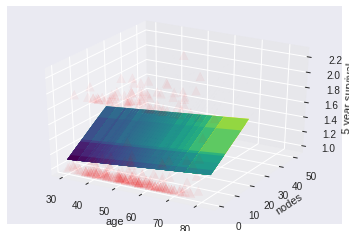

In [9]:

from sklearn.linear_model import LinearRegression
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline
model = LinearRegression().fit(df[['age', 'nodes']], df['five_year'])
coef_ = model.coef_
print('𝛽₁: {}  𝛽₂: {}  𝛽₀ {}   𝛽₁/𝛽₂ percent '.format(coef_[0], coef_[1], model.intercept_), coef_[0] * 100 / coef_[1])
X2, X3 = np.meshgrid(df['age'], df['nodes'])

def f(x,y):
  z = coef_[0] * x + coef_[1] * y + model.intercept_
  return z

X1 = f(X2, X3)
ax = plt.axes(projection='3d')
ax.plot_surface(X2, X3, X1, rstride=10, cstride=10,
                cmap='viridis', edgecolor=None, alpha=1.0)
ax.scatter(df['age'],df['nodes'], df['five_year'], c='r', marker='^', s=80, alpha=0.04)
ax.set_xlabel('age')
ax.set_ylabel('nodes')
ax.set_zlabel('5 year survival')
plt.show()


In [10]:
model = LinearRegression().fit(df[['age', 'nodes', 'year']], df['five_year'])
coef_ = model.coef_
print(f'𝛽₁: {coef_[0]}  𝛽₂: {coef_[1]}  𝛽₃: {coef_[2]}  𝛽₀ { model.intercept_}')
print(f'𝛽₁/𝛽₂ percentage {coef_[0] * 100 /coef_[1]} 𝛽₃/𝛽₂ percentage {math.fabs(coef_[2]) * 100 /math.fabs(coef_[1])}')
      

𝛽₁: 0.00357671519323598  𝛽₂: 0.017962533217089422  𝛽₃: -0.0015634832480977048  𝛽₀ 1.1030300657038725
𝛽₁/𝛽₂ percentage 19.912086730802084 𝛽₃/𝛽₂ percentage 8.704135598258594


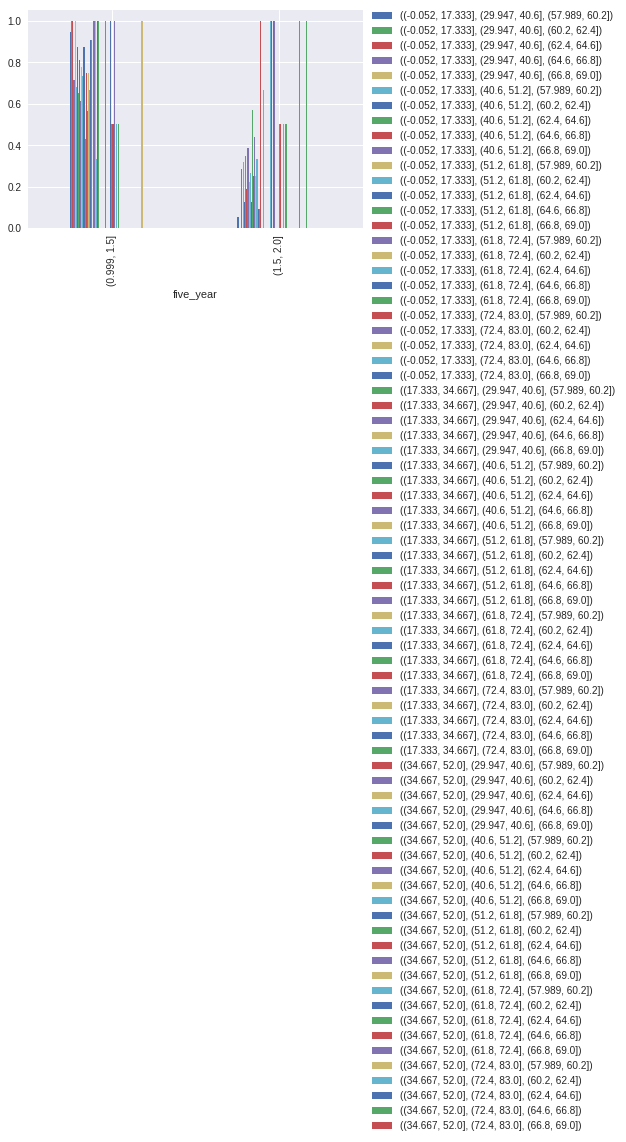

In [11]:
nodes_bins = pd.cut(df['nodes'], 3)
five_year_bins = pd.cut(df['five_year'], 2)
age_bins = pd.cut(df['age'], 5)
year_bins = pd.cut(df['year'], 5)
ct = pd.crosstab(five_year_bins, [nodes_bins, age_bins, year_bins], normalize='columns')
ct.plot(kind='bar', stacked=False).legend(bbox_to_anchor=(1.0, 1.04));

In [12]:
print(ct)

nodes        (-0.052, 17.333]                                         \
age            (29.947, 40.6]                                          
year           (57.989, 60.2] (60.2, 62.4] (62.4, 64.6] (64.6, 66.8]   
five_year                                                              
(0.999, 1.5]         0.947368          1.0          1.0     0.714286   
(1.5, 2.0]           0.052632          0.0          0.0     0.285714   

nodes                                                               \
age                         (40.6, 51.2]                             
year         (66.8, 69.0] (57.989, 60.2] (60.2, 62.4] (62.4, 64.6]   
five_year                                                            
(0.999, 1.5]          1.0           0.68        0.875     0.652174   
(1.5, 2.0]            0.0           0.32        0.125     0.347826   

nodes                                      ...      (34.667, 52.0]  \
age                                        ...        (61.8, 72.4]   
year  

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive correlation with survival?
### treatment year
- What is at least one feature that looks to have a negative correlation with survival?
### nodes and age
- How are those two features related with each other, and what might that mean?
### treatment year is only 8.7% as important as nodes in predicting 5 year survival, showing that the severity of the cancer is more imporant than the progress made in treating cancer.

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.